In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datafile = open("car.data", "r")

In [3]:
df = pd.read_csv("car.data", header=None)

In [4]:
print("unique values in col 0: ", df[0].unique())
print("unique values in col 1: ", df[1].unique())
print("unique values in col 2: ", df[2].unique())
print("unique values in col 3: ", df[3].unique())
print("unique values in col 4: ", df[4].unique())
print("unique values in col 5: ", df[5].unique())
print("unique values in col 6: ", df[6].unique())

unique values in col 0:  ['vhigh' 'high' 'med' 'low']
unique values in col 1:  ['vhigh' 'high' 'med' 'low']
unique values in col 2:  ['2' '3' '4' '5more']
unique values in col 3:  ['2' '4' 'more']
unique values in col 4:  ['small' 'med' 'big']
unique values in col 5:  ['low' 'med' 'high']
unique values in col 6:  ['unacc' 'acc' 'vgood' 'good']


In [5]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df_target, df_train = df.pop('class'),df

In [7]:
df_train

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [8]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
train = encoder.fit_transform(df_train)
target = ce.OrdinalEncoder(cols=['class']).fit_transform(df_target)

In [9]:
train

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


In [10]:
target

,class
0,1
1,1
2,1
3,1
4,1
...,...
1723,4
1724,3
1725,1
1726,4


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,target,test_size=0.4, random_state=42)

# Single Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Text(0.9838709677419355, 0.375, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 18, 0]')

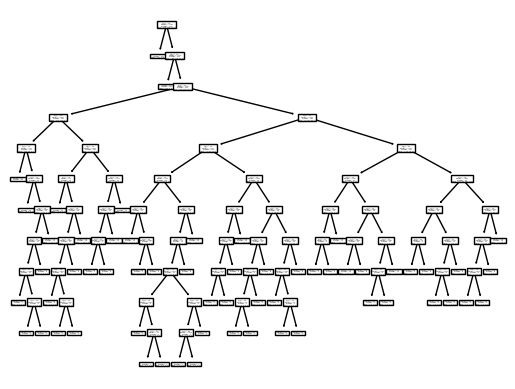

In [13]:
plot_tree(clf)[-1]

In [18]:
from sklearn.metrics import f1_score, accuracy_score
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9682080924855492
F1 score:  0.9688528131128146


# 20 trees

In [17]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(train, target, test_size=0.4, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test_i, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test_i,y_pred)
    # print("acc: ",accuracy)
    # print("f1score: ",f1_score)
    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.971098265895954
Average F1-Score: 0.9710409972946179


# Taking Gini Index as criterion

## One tree

Text(0.9821428571428571, 0.4230769230769231, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18, 0]')

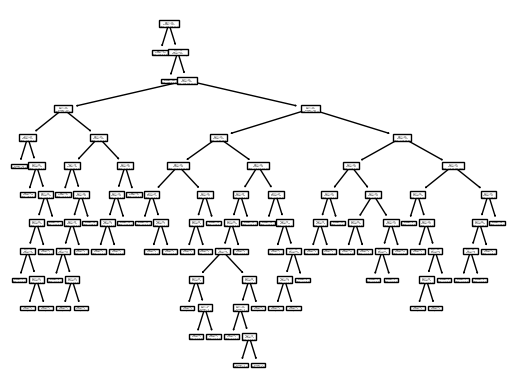

In [19]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train,y_train)
plot_tree(clf)[-1]

In [20]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9667630057803468
F1 score:  0.9677891309449717


## 20 trees

In [21]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(train, target, test_size=0.4, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test_i, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test_i,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.9715317919075144
Average F1-Score: 0.9714449075763458


# 70:30 data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

### Entropy

#### One Tree

In [23]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Text(0.9852941176470589, 0.375, 'entropy = 0.0\nsamples = 20\nvalue = [0, 0, 20, 0]')

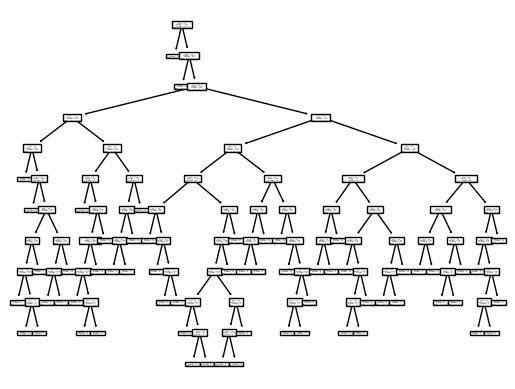

In [24]:
plot_tree(clf)[-1]

In [25]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9672447013487476
F1 score:  0.9675815103200162


### 20 Trees

#### Single Tree

In [26]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(train, target, test_size=0.3, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test_i, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test_i,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.9768786127167631
Average F1-Score: 0.9767233261287191


## Gini Index

#### One Tree

In [27]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train,y_train)

DecisionTreeClassifier()

Text(0.9882352941176471, 0.34615384615384615, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0]')

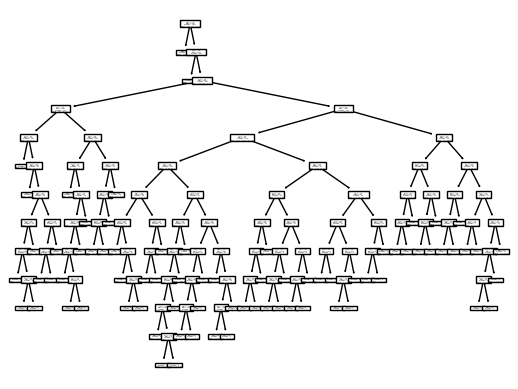

In [28]:
plot_tree(clf)[-1]

In [29]:

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9633911368015414
F1 score:  0.9633953843864053


#### 20 Trees

In [30]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(train, target, test_size=0.3, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test_i, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test_i,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.977456647398844
Average F1-Score: 0.9772998862165829


# 80:20 data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

### Entropy

#### One Tree

In [32]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Text(0.9864864864864865, 0.4230769230769231, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 25, 0]')

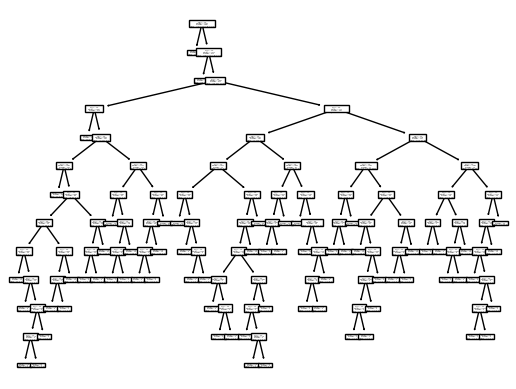

In [33]:
plot_tree(clf)[-1]

In [34]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9653179190751445
F1 score:  0.967508043047297


### 20 Trees

#### Single Tree

In [36]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(train, target, test_size=0.2, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test_i, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test_i,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.9767341040462426
Average F1-Score: 0.9766253791747739


## Gini Index

#### One Tree

In [37]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train,y_train)

DecisionTreeClassifier()

Text(0.9846153846153847, 0.4230769230769231, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25, 0]')

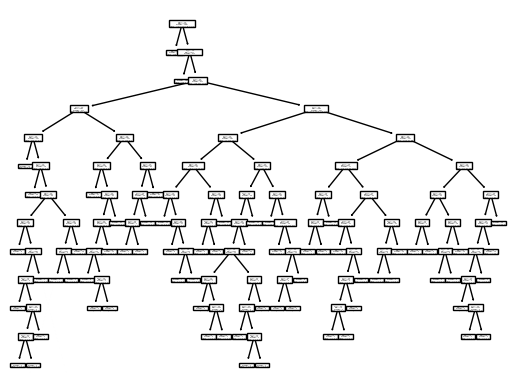

In [38]:
plot_tree(clf)[-1]

In [39]:

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9624277456647399
F1 score:  0.9644752051546855


#### 20 Trees

In [40]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(train, target, test_size=0.2, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.5329479768786125
Average F1-Score: 0.5266511940071563
